In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the CSV data for static TL
df_static = pd.read_csv("outputs/static_vehicle_data/processed_static_vehicle_data.csv")

# Remove trailing spaces in column names
df_static.columns = df_static.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_static = df_static[(df_static['data_timestep'] >= 900)]

In [3]:
# Load the CSV data for QL
df_dynamic_QL = pd.read_csv("outputs/dynamic_QL_vehicle_data/processed_dynamic_QL_vehicle_data.csv")

# Remove trailing spaces in column names
df_dynamic_QL.columns = df_dynamic_QL.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_dynamic_QL = df_dynamic_QL[(df_dynamic_QL['data_timestep'] >= 900)]

In [4]:
# Load the CSV data for DQL
df_dynamic_DQL = pd.read_csv("outputs/dynamic_DQL_vehicle_data/processed_dynamic_DQL_vehicle_data.csv")

# Remove trailing spaces in column names
df_dynamic_DQL.columns = df_dynamic_DQL.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_dynamic_DQL = df_dynamic_DQL[(df_dynamic_DQL['data_timestep'] >= 900)]

In [5]:
# for queue lengths
df_dynamic_QL['lane_queueing_length'] = pd.to_numeric(df_dynamic_QL['lane_queueing_length'], 
                                                    errors='coerce')
df_static['lane_queueing_length'] = pd.to_numeric(df_static['lane_queueing_length'], 
                                                    errors='coerce')
df_dynamic_DQL['lane_queueing_length'] = pd.to_numeric(df_dynamic_DQL['lane_queueing_length'], 
                                                    errors='coerce')

# for waiting times
df_dynamic_QL['lane_queueing_time'] = pd.to_numeric(df_dynamic_QL['lane_queueing_time'], 
                                                    errors='coerce')
df_static['lane_queueing_time'] = pd.to_numeric(df_static['lane_queueing_time'], 
                                                    errors='coerce')
df_dynamic_DQL['lane_queueing_time'] = pd.to_numeric(df_dynamic_DQL['lane_queueing_time'], 
                                                    errors='coerce')


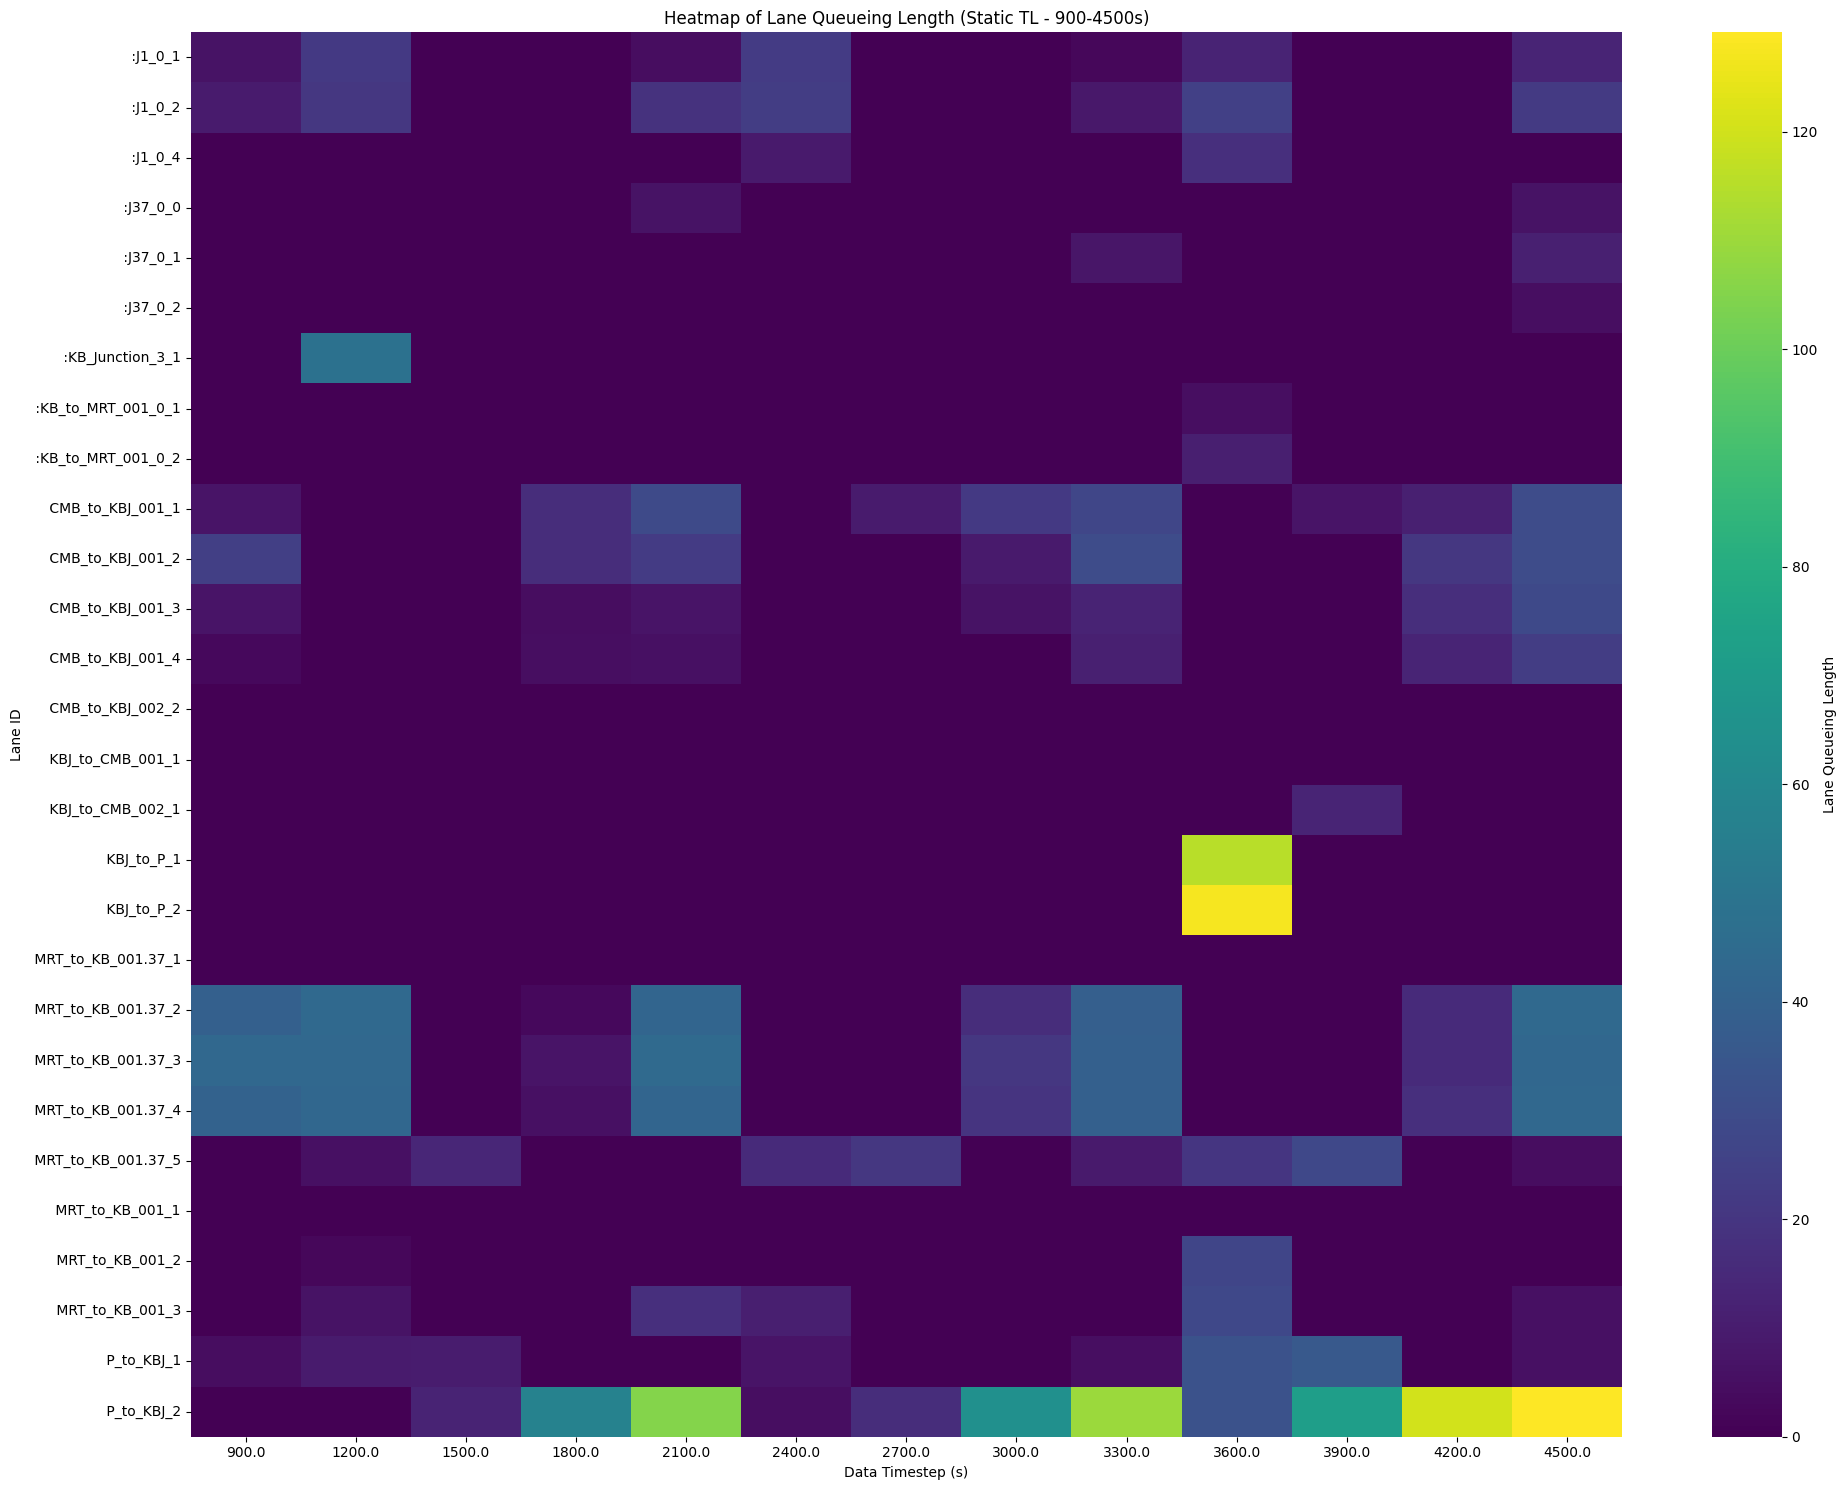

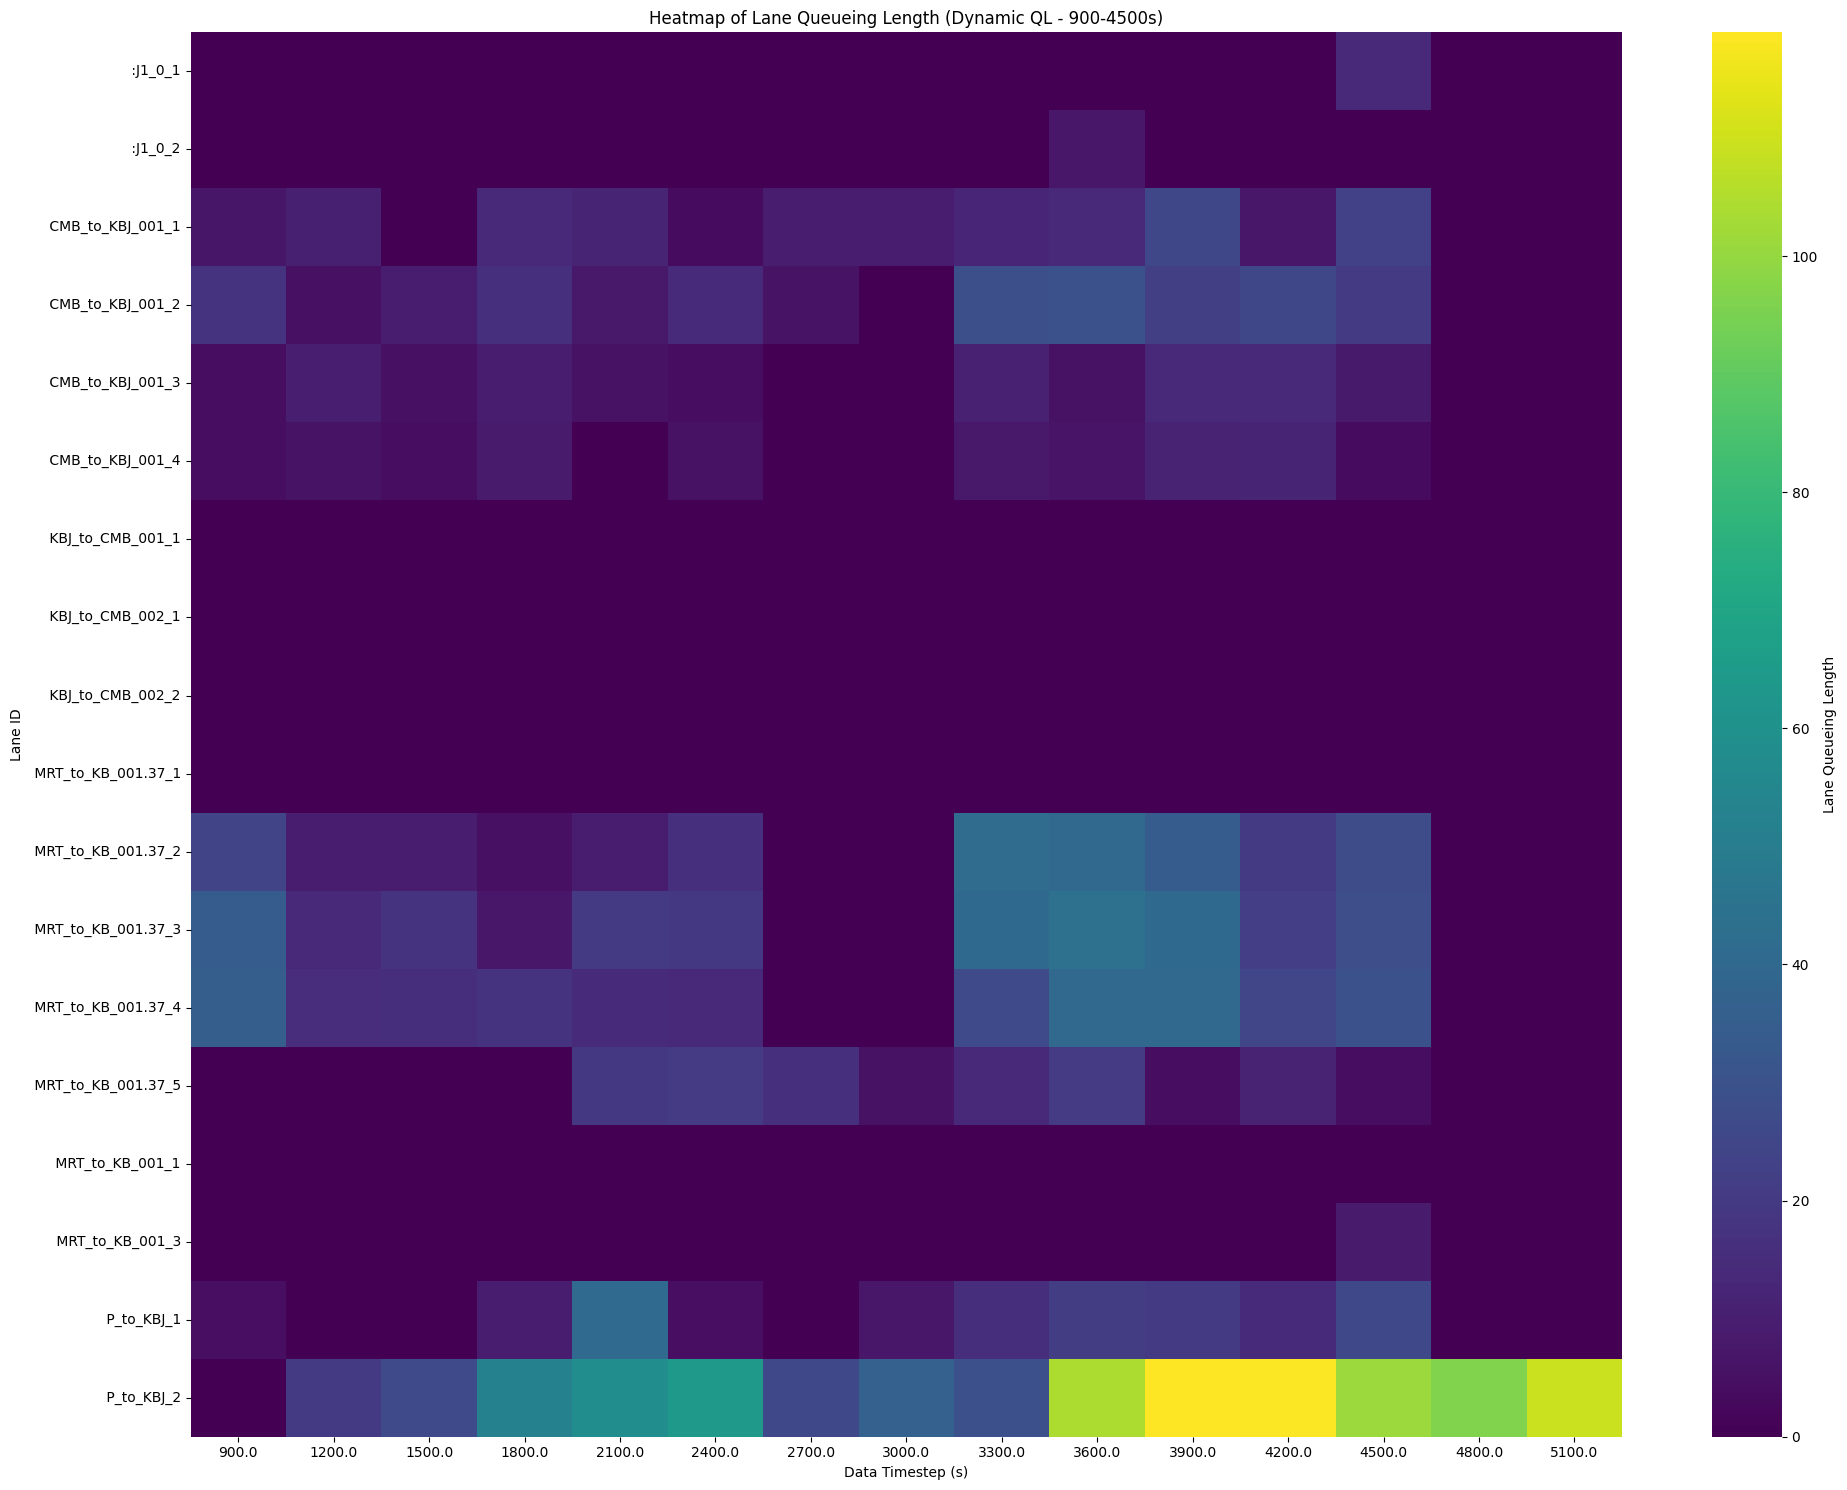

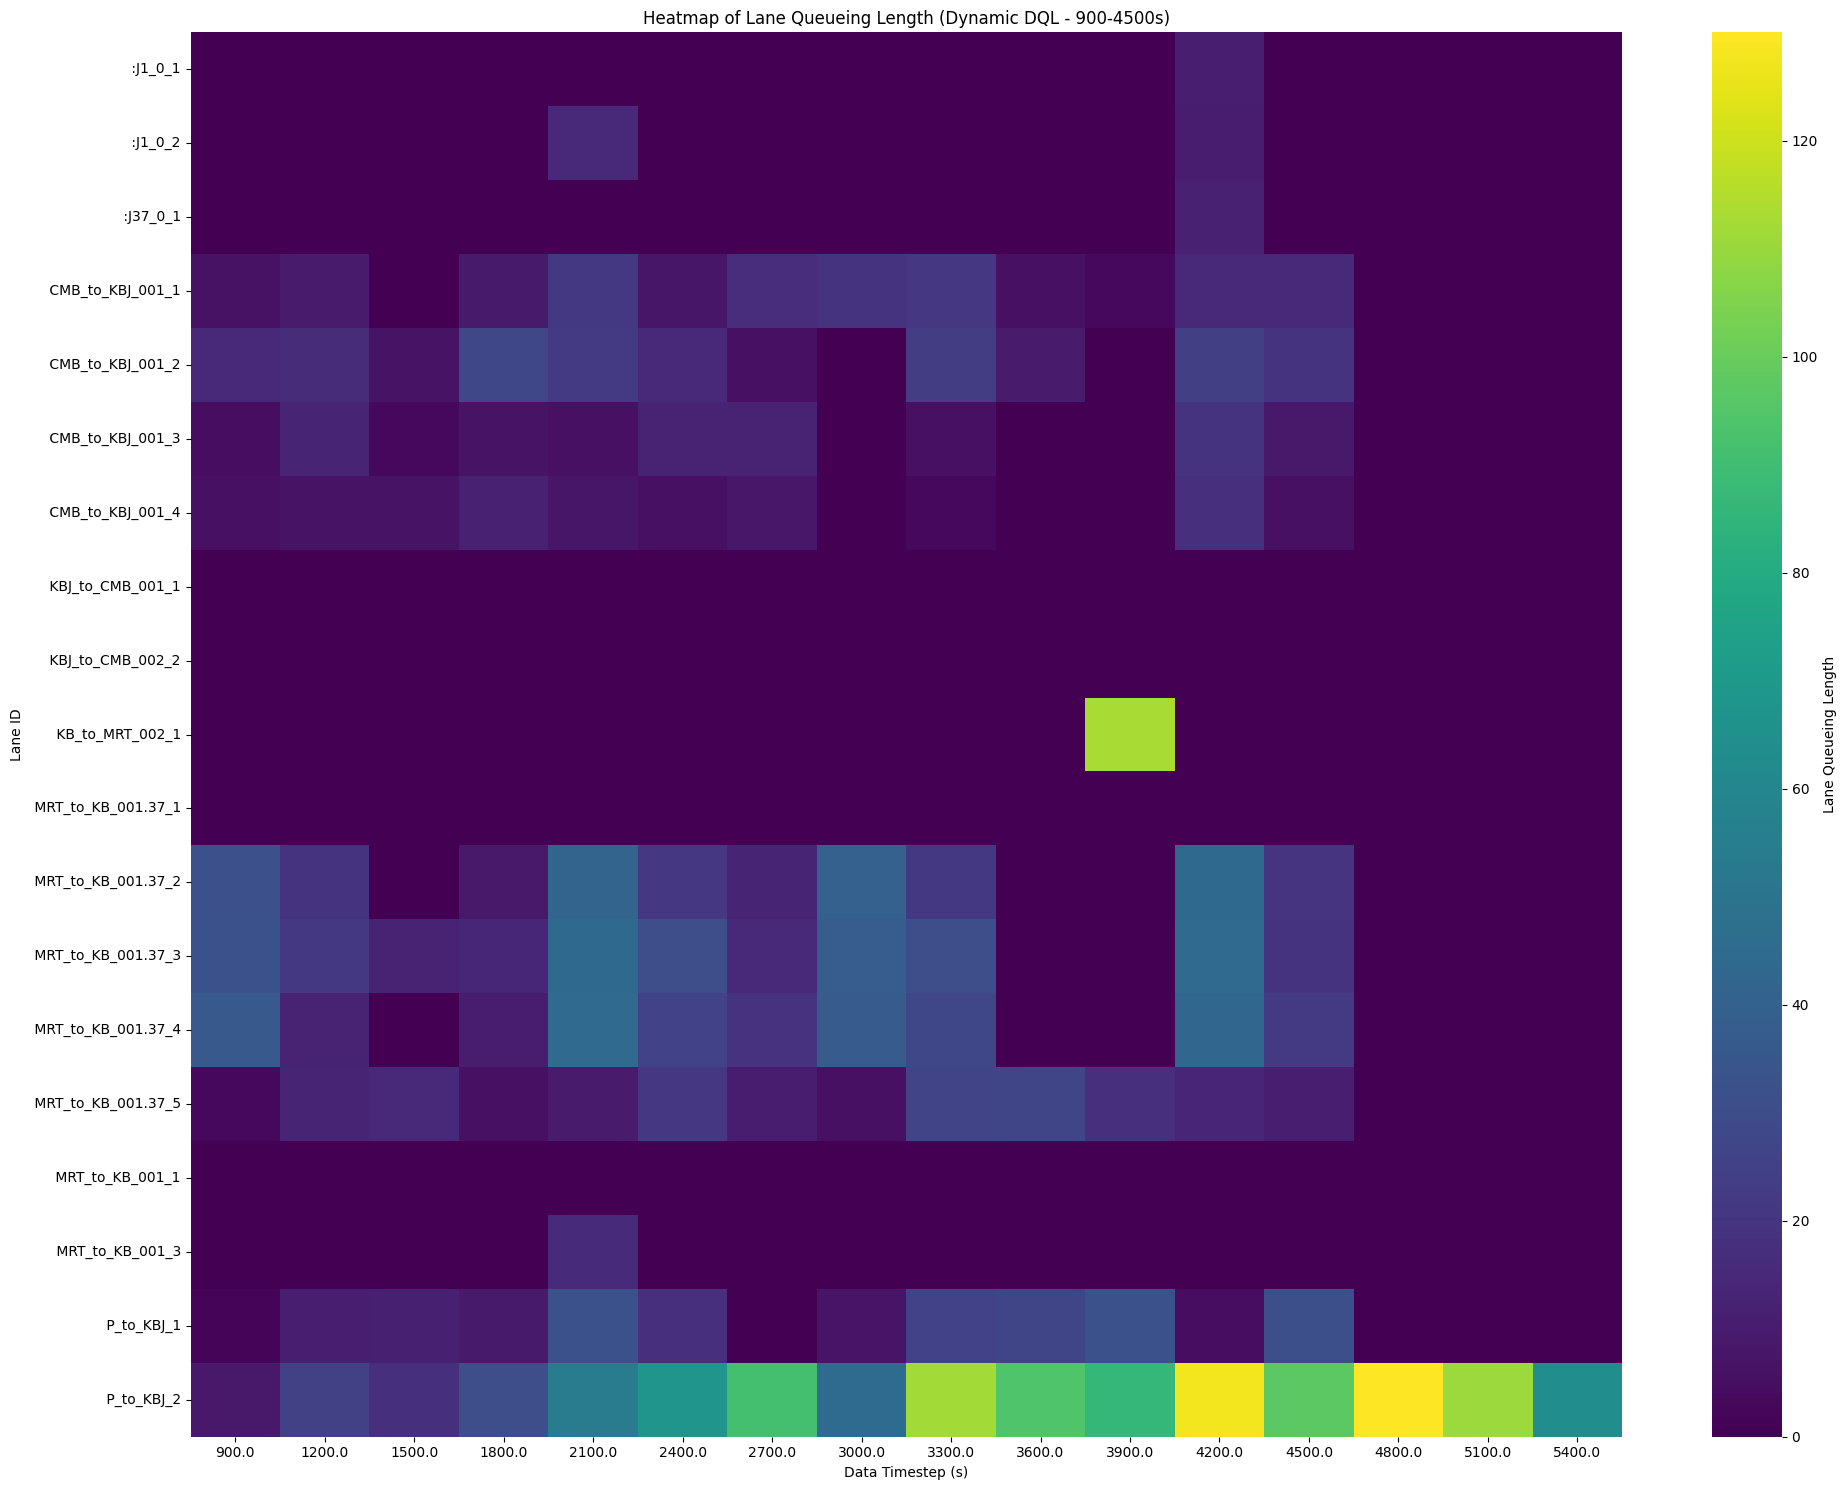

In [6]:
# --- Generate Heatmap for Static Traffic Light Control ---
heatmap_data_static = df_static.pivot_table(
    index='lane_id',
    columns='data_timestep',
    values='lane_queueing_length'
).fillna(0)

plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data_static, cmap='viridis', cbar_kws={'label': 'Lane Queueing Length'})
plt.title('Heatmap of Lane Queueing Length (Static TL - 900-4500s)')
plt.xlabel('Data Timestep (s)')
plt.ylabel('Lane ID')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('outputs/plots/heatmap_static_TL.png')
plt.show()


# --- Generate Heatmap for Dynamic Q-Learning Control ---
heatmap_data_QL = df_dynamic_QL.pivot_table(
    index='lane_id',
    columns='data_timestep',
    values='lane_queueing_length'
).fillna(0)

plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data_QL, cmap='viridis', cbar_kws={'label': 'Lane Queueing Length'})
plt.title('Heatmap of Lane Queueing Length (Dynamic QL - 900-4500s)')
plt.xlabel('Data Timestep (s)')
plt.ylabel('Lane ID')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('outputs/plots/heatmap_dynamic_QL.png')
plt.show()


# --- Generate Heatmap for Dynamic DQL Control ---
heatmap_data_DQL = df_dynamic_DQL.pivot_table(
    index='lane_id',
    columns='data_timestep',
    values='lane_queueing_length'
).fillna(0)

plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data_DQL, cmap='viridis', cbar_kws={'label': 'Lane Queueing Length'})
plt.title('Heatmap of Lane Queueing Length (Dynamic DQL - 900-4500s)')
plt.xlabel('Data Timestep (s)')
plt.ylabel('Lane ID')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('outputs/plots/heatmap_dynamic_DQL.png')
plt.show()

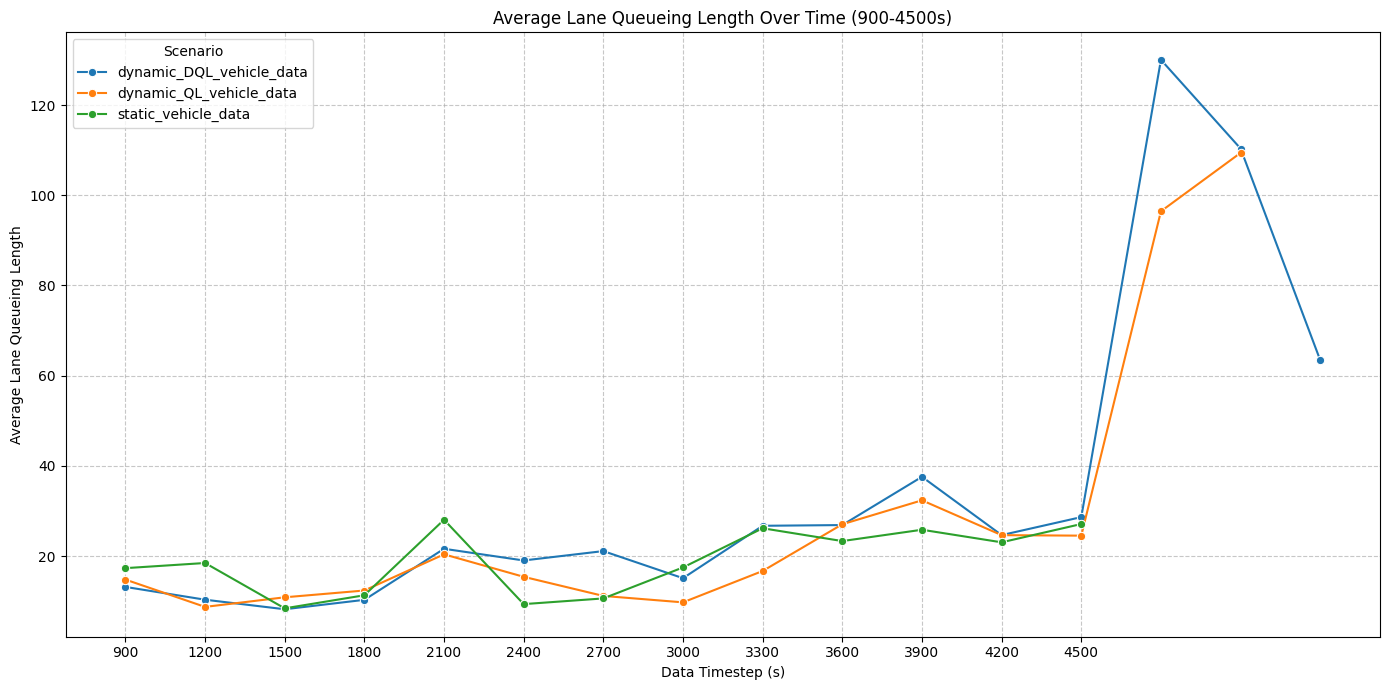

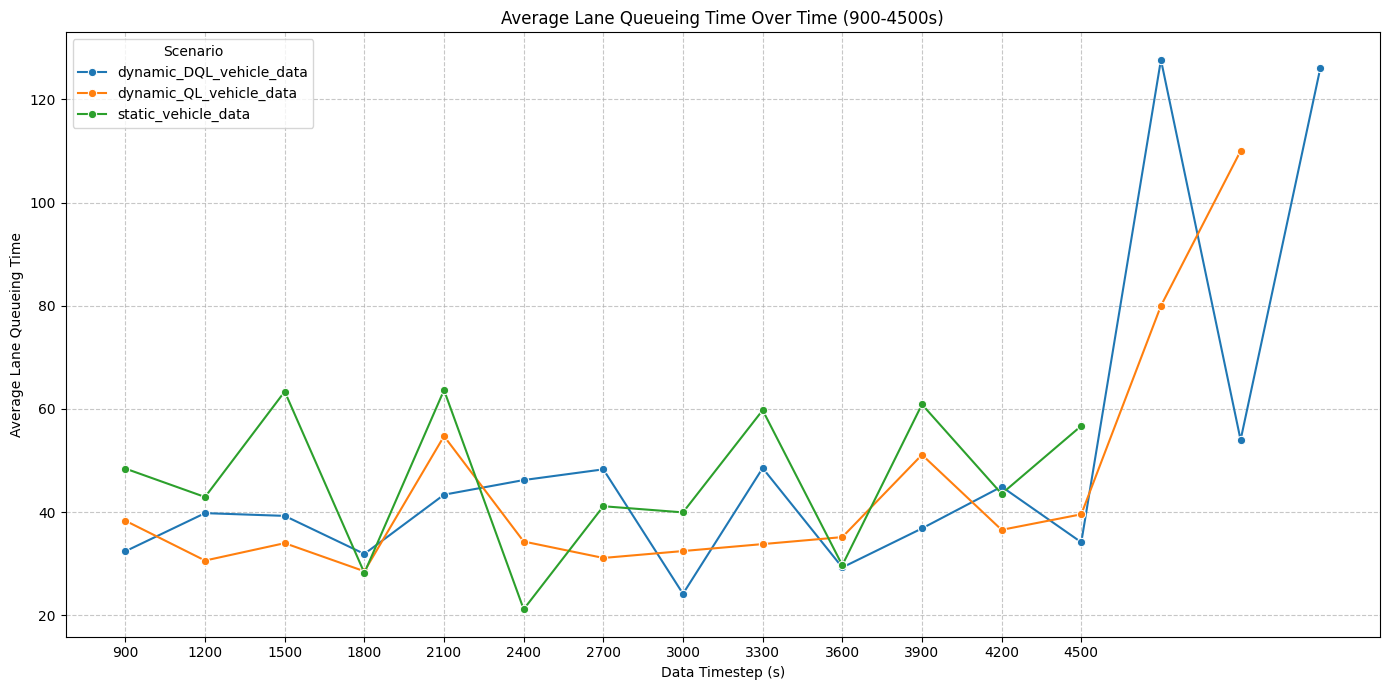

In [10]:
# Concatenate all dataframes into a single dataframe for easier plotting
combined_df = pd.concat([df_static, df_dynamic_QL, df_dynamic_DQL])

# --- 1. Line Plots: Average Queueing Length and Time Over Time ---

# Calculate the mean queueing length per timestep for each scenario
avg_length_over_time = combined_df.groupby(['data_timestep', 'scenario'])['lane_queueing_length'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_length_over_time, x='data_timestep', y='lane_queueing_length', hue='scenario', marker='o')
plt.title('Average Lane Queueing Length Over Time (900-4500s)')
plt.xlabel('Data Timestep (s)')
plt.ylabel('Average Lane Queueing Length')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Scenario')
plt.tight_layout()
plt.xticks(np.arange(900, 4501, 300))
plt.savefig('outputs/plots/avg_queueing_length_experimental_over_time_lineplot.png')
plt.show()

# Calculate the mean queueing time per timestep for each scenario
avg_time_over_time = combined_df.groupby(['data_timestep', 'scenario'])['lane_queueing_time'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_time_over_time, x='data_timestep', y='lane_queueing_time', hue='scenario', marker='o')
plt.title('Average Lane Queueing Time Over Time (900-4500s)')
plt.xlabel('Data Timestep (s)')
plt.ylabel('Average Lane Queueing Time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Scenario')
plt.tight_layout()
plt.xticks(np.arange(900, 4501, 300))
plt.savefig('outputs/plots/avg_queueing_time_over_time_lineplot.png')
plt.show()


# --- 2. Bar Charts: Overall Average Queueing Length and Time Comparison ---

# Calculate the overall mean for each metric and scenario
overall_avg_metrics = combined_df.groupby('scenario').agg(
    overall_avg_queue_length=('lane_queueing_length', 'mean'),
    overall_avg_queue_time=('lane_queueing_time', 'mean')
).reset_index()


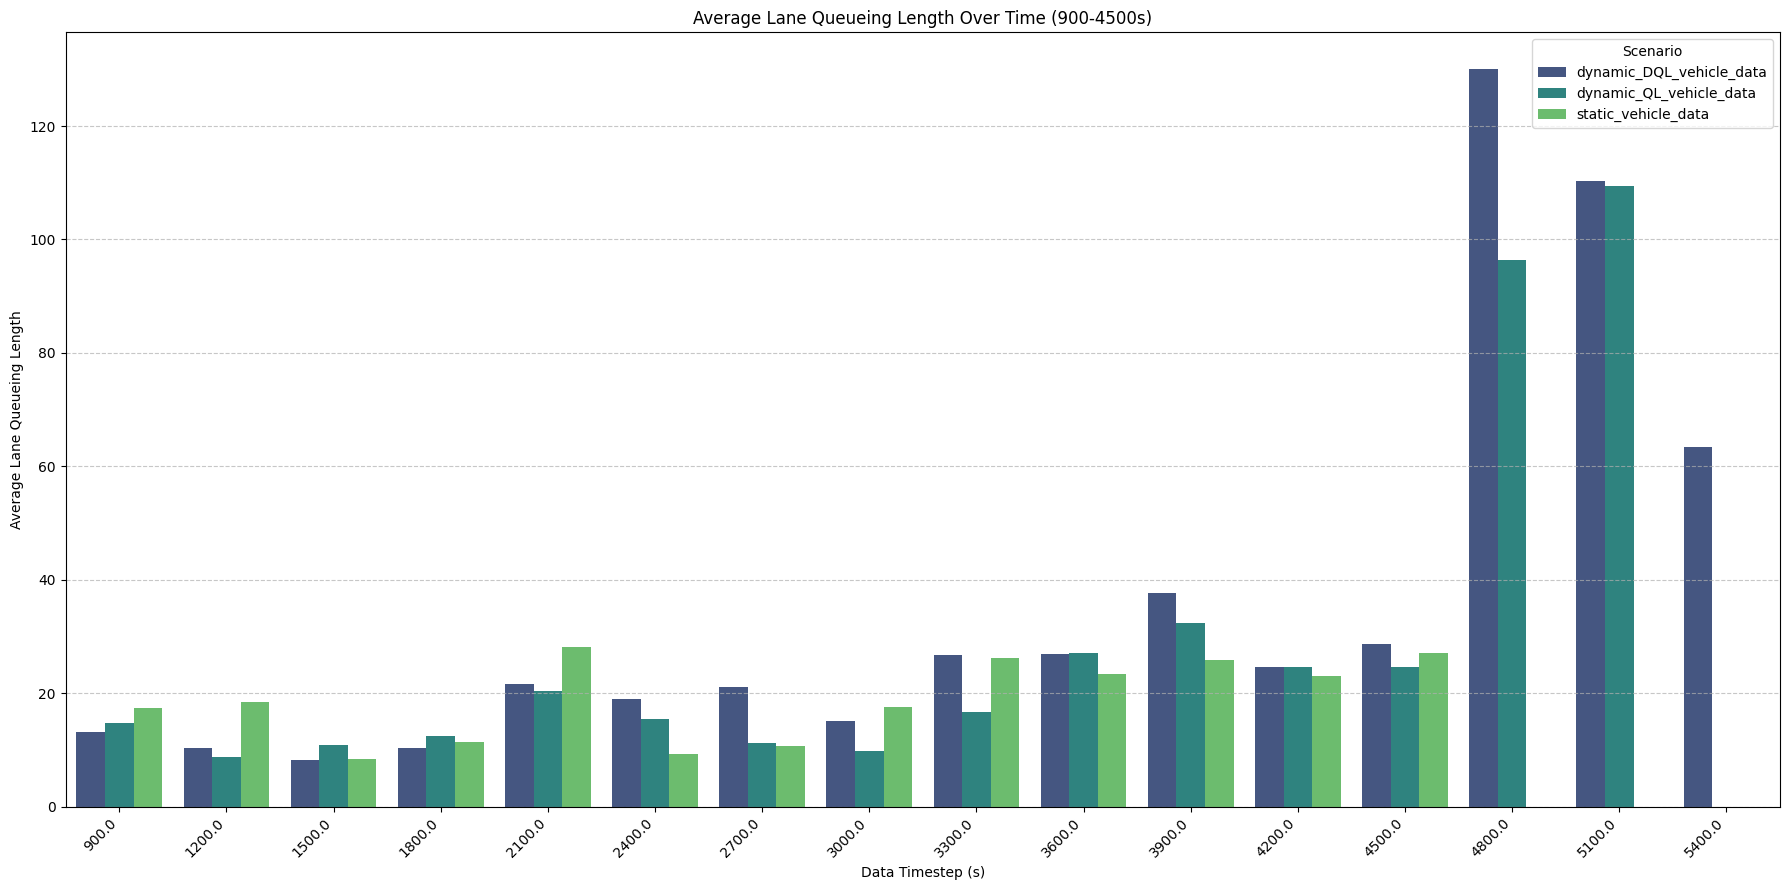

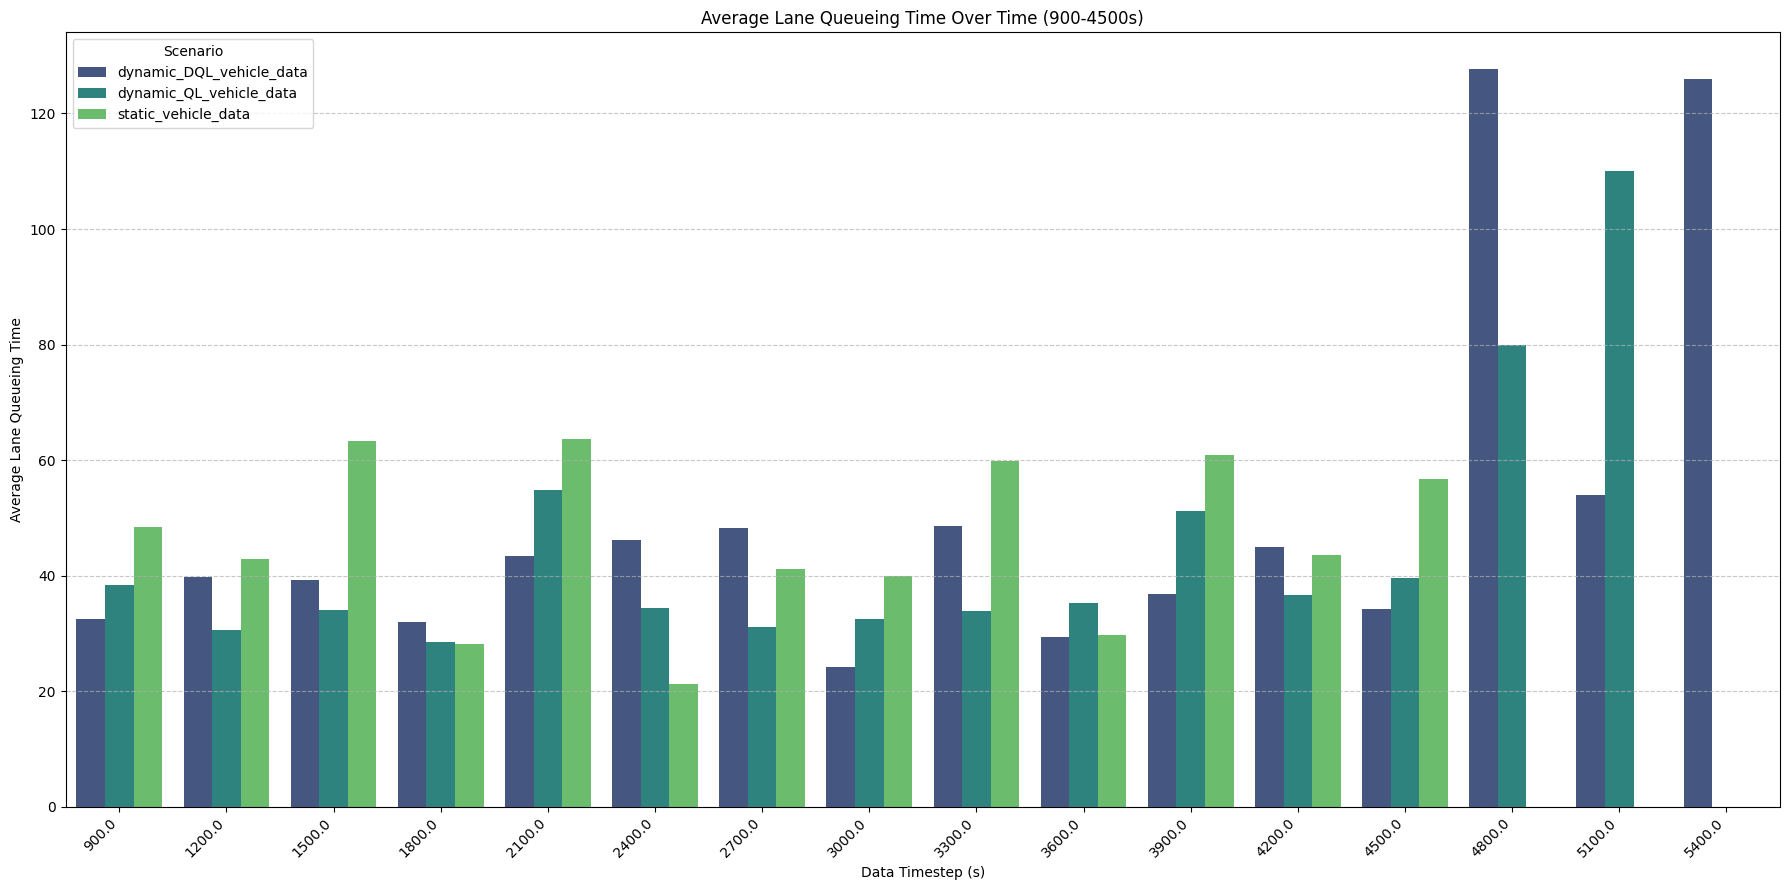

In [8]:
# --- 1. Bar Plots: Average Queueing Length and Time Over Time ---

# Calculate the mean queueing length per timestep for each scenario
avg_length_over_time = combined_df.groupby(['data_timestep', 'scenario'])['lane_queueing_length'].mean().reset_index()

plt.figure(figsize=(18, 9)) # Increased figure width for better bar spacing
sns.barplot(data=avg_length_over_time, x='data_timestep', y='lane_queueing_length', hue='scenario', palette='viridis')
plt.title('Average Lane Queueing Length Over Time (900-4500s)')
plt.xlabel('Data Timestep (s)')
plt.ylabel('Average Lane Queueing Length')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid on y-axis for readability
plt.legend(title='Scenario')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if timesteps are numerous
plt.tight_layout()
plt.savefig('outputs/plots/avg_queueing_length_experimental_over_time_bar_chart.png')
plt.show()

# Calculate the mean queueing time per timestep for each scenario
avg_time_over_time = combined_df.groupby(['data_timestep', 'scenario'])['lane_queueing_time'].mean().reset_index()

plt.figure(figsize=(18, 9)) # Increased figure width for better bar spacing
sns.barplot(data=avg_time_over_time, x='data_timestep', y='lane_queueing_time', hue='scenario', palette='viridis')
plt.title('Average Lane Queueing Time Over Time (900-4500s)')
plt.xlabel('Data Timestep (s)')
plt.ylabel('Average Lane Queueing Time')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid on y-axis for readability
plt.legend(title='Scenario')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if timesteps are numerous
plt.tight_layout()
plt.savefig('outputs/plots/avg_queueing_time_over_time_bar_chart.png')
plt.show()


# --- 2. Bar Charts: Overall Average Queueing Length and Time Comparison ---

# Calculate the overall mean for each metric and scenario
overall_avg_metrics = combined_df.groupby('scenario').agg(
    overall_avg_queue_length=('lane_queueing_length', 'mean'),
    overall_avg_queue_time=('lane_queueing_time', 'mean')
).reset_index()